In [1]:
import numpy as np
import pandas as pd

C:\Users\Ansh Trivedi\AppData\Local\Temp\ipykernel_17516\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('titanic (1).csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

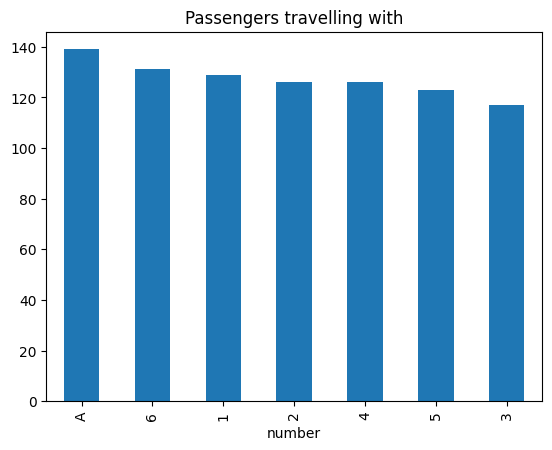

In [5]:
fig=df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [6]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [7]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [8]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [19]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)') # captures numeric part
df['cabin_cat']=df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

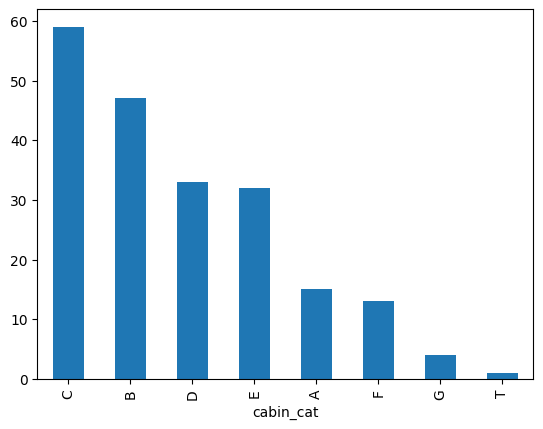

In [20]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [29]:
# extract the last bit of ticket as number
df['ticket_num']=df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_num']=pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

#extract the first part of ticket as category
df['ticket_cat']=df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [30]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN


# Handling Dates and Time Variables

In [33]:
date=pd.read_csv('orders.csv')
time=pd.read_csv('messages.csv')

In [34]:
date

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3
...,...,...,...,...
995,2018-10-08,255,13,1
996,2018-12-06,5521,7,1
997,2019-05-07,487,26,14
998,2019-03-03,1503,21,2


In [35]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [36]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [37]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


## Working with dates

In [38]:
#Converting to datetime datatype
date['date']=pd.to_datetime(date['date'])

In [39]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


### 1. Extract Year

In [40]:
date['date_year']=date['date'].dt.year

date.head()

,date,product_id,city_id,orders,date_year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019


### 2. Extract Month

In [41]:
date['date_month']=date['date'].dt.month

date.head()

,date,product_id,city_id,orders,date_year,date_month
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [42]:
date['date_month_name']=date['date'].dt.month_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


### 3.Extract days

In [43]:
date['date_day']=date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [44]:
# day of week
date['date_dow'] = date['date'].dt.dayofweek

date.head()

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dow
0,2019-12-10,5628,25,3,2019,12,December,10,1
1,2018-08-15,3646,14,157,2018,8,August,15,2
2,2018-10-23,1859,25,1,2018,10,October,23,1
3,2019-08-17,7292,25,1,2019,8,August,17,5
4,2019-01-06,4344,25,3,2019,1,January,6,6


In [45]:
# day of week - name

date['date_dow_name'] = date['date'].dt.day_name()

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month,date_month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,10,1,Tuesday
1,2018-08-15,2018,8,August,15,2,Wednesday
2,2018-10-23,2018,10,October,23,1,Tuesday
3,2019-08-17,2019,8,August,17,5,Saturday
4,2019-01-06,2019,1,January,6,6,Sunday


In [46]:
# is weekend ?
date['date_is_weekend']=np.where(date['date_dow_name'].isin(['Sunday','Saturday']),1,0)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


### Extract quarter

In [50]:
date['quarter']=date['date'].dt.quarter
date.head()

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,quarter
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,4
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,3
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,4
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,3
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1


### Extract Semester

In [51]:
date['semester']=np.where(date['quarter'].isin([1,2]),1,2)
date.head()

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,quarter,semester
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,4,2
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,3,2
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,4,2
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,3,2
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1


### Extract time elapsed between dates


In [52]:
import datetime

today=datetime.datetime.today()

In [53]:
today

datetime.datetime(2025, 1, 5, 15, 11, 22, 774456)

In [54]:
today - date['date']

0     1853 days 15:11:22.774456
1     2335 days 15:11:22.774456
2     2266 days 15:11:22.774456
3     1968 days 15:11:22.774456
4     2191 days 15:11:22.774456
                 ...           
995   2281 days 15:11:22.774456
996   2222 days 15:11:22.774456
997   2070 days 15:11:22.774456
998   2135 days 15:11:22.774456
999   1909 days 15:11:22.774456
Name: date, Length: 1000, dtype: timedelta64[ns]

In [55]:
(today - date['date']).dt.days

0      1853
1      2335
2      2266
3      1968
4      2191
       ... 
995    2281
996    2222
997    2070
998    2135
999    1909
Name: date, Length: 1000, dtype: int64

In [57]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [58]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [59]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [60]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


### Extract time part

In [61]:
time['time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


### Time difference

In [62]:
today - time['date']

0     4039 days 14:21:22.774456
1     3903 days 15:31:22.774456
2     4389 days 14:50:22.774456
3     3691 days 14:40:22.774456
4     4088 days 16:00:22.774456
                 ...           
995   4678 days 14:21:22.774456
996   3999 days 15:57:22.774456
997   4464 days 15:34:22.774456
998   4580 days 15:37:22.774456
999   3852 days 15:46:22.774456
Name: date, Length: 1000, dtype: timedelta64[ns]

In [63]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      3.490213e+08
1      3.372751e+08
2      3.792630e+08
3      3.189552e+08
4      3.532608e+08
           ...     
995    4.042309e+08
996    3.455710e+08
997    3.857457e+08
998    3.957682e+08
999    3.328696e+08
Name: date, Length: 1000, dtype: float64

In [64]:
# in minutes

(today - time['date'])/np.timedelta64(1,'m')

0      5.817021e+06
1      5.621251e+06
2      6.321050e+06
3      5.315920e+06
4      5.887680e+06
           ...     
995    6.737181e+06
996    5.759517e+06
997    6.429094e+06
998    6.596137e+06
999    5.547826e+06
Name: date, Length: 1000, dtype: float64

In [65]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0       96950.356326
1       93687.522993
2      105350.839660
3       88598.672993
4       98128.006326
           ...      
995    112286.356326
996     95991.956326
997    107151.572993
998    109935.622993
999     92463.772993
Name: date, Length: 1000, dtype: float64